# Baseline Model Notebook - StatsSA

This notebook is about the creation of a baseline model for the Zindi competition **Women in Big Data South Africa - Women-Headed Households in South Africa**. We'll take a quick look at the data, show how to create a baseline model, in order to have something to compare our later models to.

# Loading the data
Make sure the CSV files provided by Zindi are in the same folder as this notebook. We load the Train.csv. 

In [1]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('data/Train.csv')
df.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ward               2822 non-null   object 
 1   total_households   2822 non-null   float64
 2   total_individuals  2822 non-null   float64
 3   target             2822 non-null   float64
 4   dw_00              2822 non-null   float64
 5   dw_01              2822 non-null   float64
 6   dw_02              2822 non-null   float64
 7   dw_03              2822 non-null   float64
 8   dw_04              2822 non-null   float64
 9   dw_05              2822 non-null   float64
 10  dw_06              2822 non-null   float64
 11  dw_07              2822 non-null   float64
 12  dw_08              2822 non-null   float64
 13  dw_09              2822 non-null   float64
 14  dw_10              2822 non-null   float64
 15  dw_11              2822 non-null   float64
 16  dw_12              2822 

In [4]:
df.isnull().sum().sort_values(ascending=False)

ward      0
pg_03     0
lan_05    0
lan_06    0
lan_07    0
         ..
car_01    0
lln_00    0
lln_01    0
lan_00    0
NL        0
Length: 63, dtype: int64

In [5]:
df.describe()

,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,lat,lon,NL
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,...,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.0,2822.0,2822.000000,2822.000000,2822.000000
mean,3665.281214,12869.130053,24.507554,0.712196,0.092616,0.032043,0.006057,0.008665,0.006289,0.022375,...,0.127555,0.041589,0.019655,0.011008,0.110818,0.0,0.0,-26.880740,28.666515,17.437560
std,3266.364522,9696.690518,10.294387,0.214035,0.182852,0.080253,0.019374,0.030697,0.024606,0.037127,...,0.156400,0.057331,0.032926,0.023672,0.185401,0.0,0.0,2.021279,2.373809,18.958621
min,1.000000,402.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-32.490089,16.760022,0.000000
25%,1778.858235,7071.205695,16.751556,0.594212,0.002895,0.002407,0.000000,0.000000,0.000000,0.002716,...,0.008673,0.002099,0.000715,0.000159,0.005217,0.0,0.0,-28.569019,27.707932,3.033397
50%,2398.249935,9366.989680,24.156670,0.766841,0.010425,0.005762,0.000807,0.000607,0.000865,0.008639,...,0.069065,0.016496,0.005164,0.001459,0.025165,0.0,0.0,-26.549866,28.959679,9.205572
75%,3987.080563,14241.233015,32.226553,0.881708,0.068209,0.027913,0.002538,0.002225,0.003027,0.025218,...,0.183384,0.058626,0.025055,0.009432,0.116638,0.0,0.0,-25.572130,30.441505,26.890531
max,39684.942130,91716.746370,55.528423,0.994962,0.931490,0.951806,0.264239,0.392085,0.435912,0.412936,...,1.000000,0.327393,0.306787,0.228261,0.961523,0.0,0.0,-22.331267,32.858249,63.000000


In [6]:
df.nunique().sort_values().head(10)

dw_13        1
lan_13       1
dw_12        1
pw_08        1
pw_07        1
lan_14    1459
dw_10     1695
dw_04     1799
dw_05     1952
dw_03     2094
dtype: int64

In [7]:
df[['dw_13', 'lan_13', 'dw_12', 'pw_08', 'pw_07']]

,dw_13,lan_13,dw_12,pw_08,pw_07
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
2817,0,0,0,0,0
2818,0,0,0,0,0
2819,0,0,0,0,0
2820,0,0,0,0,0


['dw_13', 'lan_13', 'dw_12', 'pw_08', 'pw_07'] have only 0 in them --> we could drop these features

In [8]:
# drop features with only 0 in them
df = df.drop(['dw_13', 'lan_13', 'dw_12', 'pw_08', 'pw_07'], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ward               2822 non-null   object 
 1   total_households   2822 non-null   float64
 2   total_individuals  2822 non-null   float64
 3   target             2822 non-null   float64
 4   dw_00              2822 non-null   float64
 5   dw_01              2822 non-null   float64
 6   dw_02              2822 non-null   float64
 7   dw_03              2822 non-null   float64
 8   dw_04              2822 non-null   float64
 9   dw_05              2822 non-null   float64
 10  dw_06              2822 non-null   float64
 11  dw_07              2822 non-null   float64
 12  dw_08              2822 non-null   float64
 13  dw_09              2822 non-null   float64
 14  dw_10              2822 non-null   float64
 15  dw_11              2822 non-null   float64
 16  psa_00             2822 

In [10]:
df.shape

(2822, 58)

In [11]:
var_desc = pd.read_csv('data/variable_descriptions.csv')
pd.set_option('display.max_colwidth', 200) # So that we can see the full descriptions
var_desc

,Column,Description,Unnamed: 2,Unnamed: 3
0,dw_00,Percentage of dwellings of type: House or brick/concrete block structure on a separate stand or yard or on a farm,NaN,NaN
1,dw_01,Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials,NaN,NaN
2,dw_02,Percentage of dwellings of type: Flat or apartment in a block of flats,NaN,NaN
3,dw_03,Percentage of dwellings of type: Cluster house in complex,NaN,NaN
4,dw_04,Percentage of dwellings of type: Townhouse (semi-detached house in a complex),NaN,NaN
5,dw_05,Percentage of dwellings of type: Semi-detached house,NaN,NaN
6,dw_06,Percentage of dwellings of type: House/flat/room in backyard,NaN,NaN
7,dw_07,Percentage of dwellings of type: Informal dwelling (shack,in backyard),NaN
8,dw_08,Percentage of dwellings of type: Informal dwelling (shack,not in backyard,e.g. in an informal/squatter settlement or on a farm)
9,dw_09,Percentage of dwellings of type: Room/flatlet on a property or larger dwelling/servants quarters/granny flat,NaN,NaN


# Quick EDA
Before we dive into modelling, let's take a quick look at the data and see what we have to work with. 

## Looking at the target variable
The purpose of this competition is to predict the percentage of households in a ward that are woman-headed and have an annual household income of <R19,600. To put that in context, that's less than 250USD per month. 

Text(0.5, 0, 'Percentage of households that are w-headed and have income under R19.6k/month')

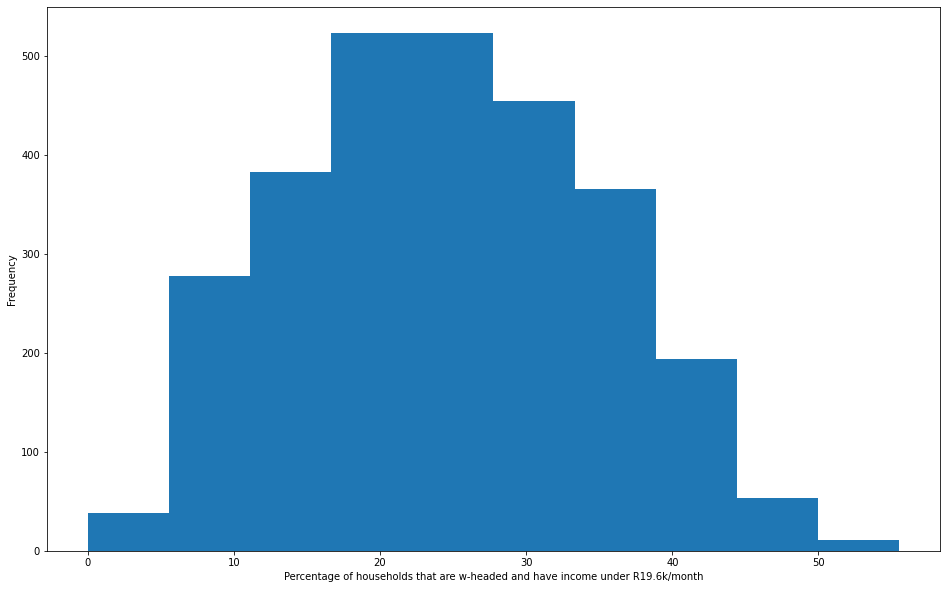

In [12]:
# Plot the distribution
ax = df['target'].plot(kind='hist')
plt.xlabel('Percentage of households that are w-headed and have income under R19.6k/month')

# Looking at a few interesting correlations

In [13]:
# Strong +ve correlations
df.corr()['target'].sort_values(ascending=False).head(10)

target    1.000000
psa_00    0.782472
car_01    0.702831
stv_01    0.664181
lln_01    0.637835
pg_00     0.613346
pw_06     0.470676
dw_01     0.458206
pw_02     0.442441
pw_03     0.440941
Name: target, dtype: float64

In [14]:
# And negative correlations
df.corr()['target'].sort_values().head(10)

pw_00    -0.754536
psa_01   -0.707506
car_00   -0.702831
stv_00   -0.664181
lln_00   -0.637835
pg_03    -0.583908
NL       -0.514398
lan_00   -0.507942
lan_01   -0.438704
dw_04    -0.385533
Name: target, dtype: float64

The feature that has the strongest correlation to our target is: psa_00 ("Percentage listing present school attendance as: Yes"). So for our really simple baseline model, we will use only this feature for predicting our target. As we have a regression problem, we will build a simple formula to use for prediction.

In [15]:
df.corr()['target']['psa_00']

0.7824722055374348

In [16]:
# Get a very reduced dataframe for the baseline model
df_base = df[['psa_00', 'target']]
df_base.head()

,psa_00,target
0,0.260191,16.773757
1,0.290228,21.496661
2,0.186435,10.931425
3,0.281229,23.119257
4,0.196687,13.652252


Let's look at the scatter plot:

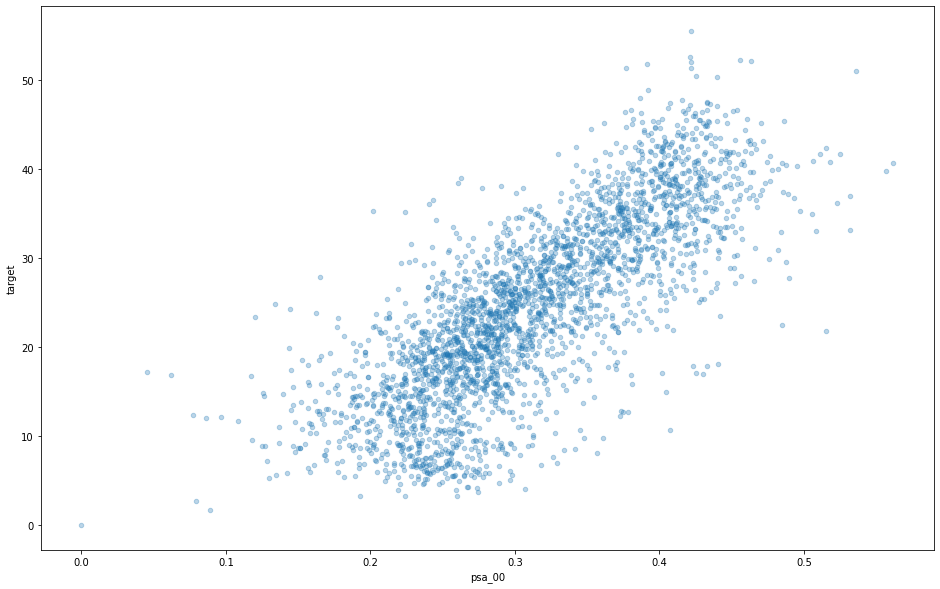

In [17]:
# psa_00: 
df_base.plot(x='psa_00', y='target', kind='scatter', alpha=0.3);

# Modelling the baseline model
Before we go deeper, we will build a quick model FIRST, to see a baseline to compare to. So, in this section we'll try a simple linear model based on only one highly correlated feature. 

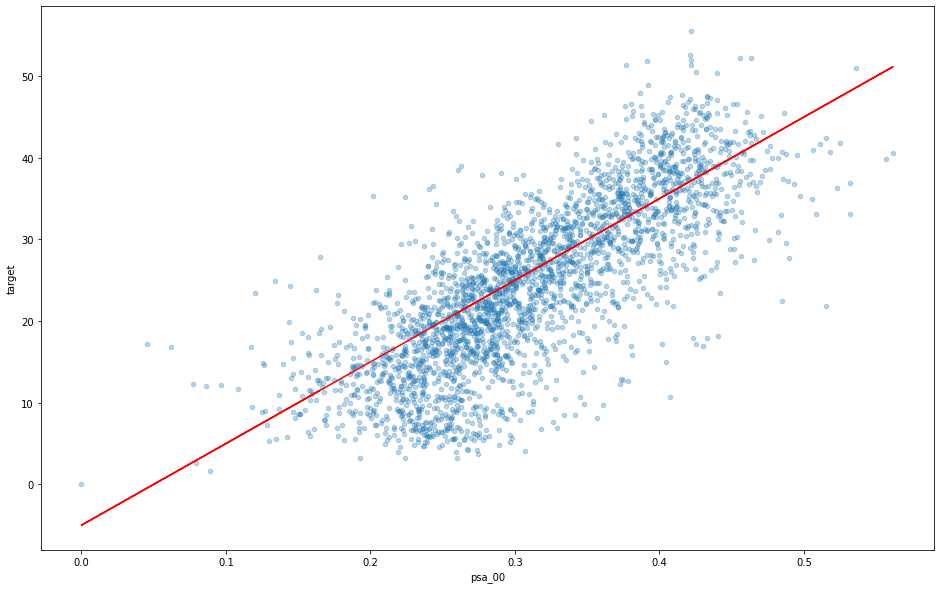

In [18]:
# Modelling by hand: regression line formula

# as we can see from the scatter plot, a line would run through (0 | -5), we only need a slope
# points would be: (0.2 | 10), (0.3 | 20) --> the slope is 100
# y = 100 * x -5

# put this line in the plot:
x = df_base['psa_00']
y = 100 * x - 5

df_base.plot(x='psa_00', y='target', kind='scatter', alpha=0.3)
plt.plot(x, y, '-r', label='y = 100 * x')
plt.show();

### Evaluating Predictions

How do we evaluate our predictions? if we run `lm.score(df[in_cols][-1000:], df[ycol][-1000:])`, we'll get something called the 'R-Squared Score', which is a measure of how well our model explains the variation in the target variable. The closer to 1, the better. But this can be hard to visualize, so I like to plot predictions vs true values to get a better idea of how close our model is coming.

Let's evaluate our first linear model:

In [19]:
# try to calculate RMSE for this line:
from sklearn.metrics import mean_squared_error

mse = sklearn.metrics.mean_squared_error(df_base['target'], y)

rmse = math.sqrt(mse)

print("RMSE of baseline model:", round(rmse, 2))
print("Error in % of baseline model:", round((rmse/np.average(y))*100, 2))
print("Mean of the target:", round(np.average(y), 2))
print("Standard deviation of the target:", round(np.std(y), 2))

RMSE of baseline model: 6.62
Error in % of baseline model: 25.35
Mean of the target: 26.13
Standard deviation of the target: 7.66


In [20]:
# Do the same, only not with formula by ourselves, but with proper linear regression

import statsmodels.api as sms

# Prepare data for modeling
# Choose the predictor and add a constant term
X = df_base[['psa_00']]
y = df_base['target']
# Our model needs an intercept so we add a column of 1s:
X = sms.add_constant(X)
display(X.head())
display(y.head())

,const,psa_00
0,1.0,0.260191
1,1.0,0.290228
2,1.0,0.186435
3,1.0,0.281229
4,1.0,0.196687


0    16.773757
1    21.496661
2    10.931425
3    23.119257
4    13.652252
Name: target, dtype: float64

In [21]:
# Create an OLS model
model = sms.OLS(y, X)
# use the data to calculate the intercept and slope
results = model.fit()
# return the output of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     4453.
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:52:41   Log-Likelihood:                -9246.7
No. Observations:                2822   AIC:                         1.850e+04
Df Residuals:                    2820   BIC:                         1.851e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.2131      0.505    -16.264      0.000      -9.203      -7.223
psa_00       105.1205      1.575     66.731      0.000     102.032     108.209
==============================================================================
Omnibus:                       47.547   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.562
Skew:                          -0.258   Prob(JB):                     8.61e-13
Kurtosis:                       3.454   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For this linear regression model, our RMSE would be much improved!

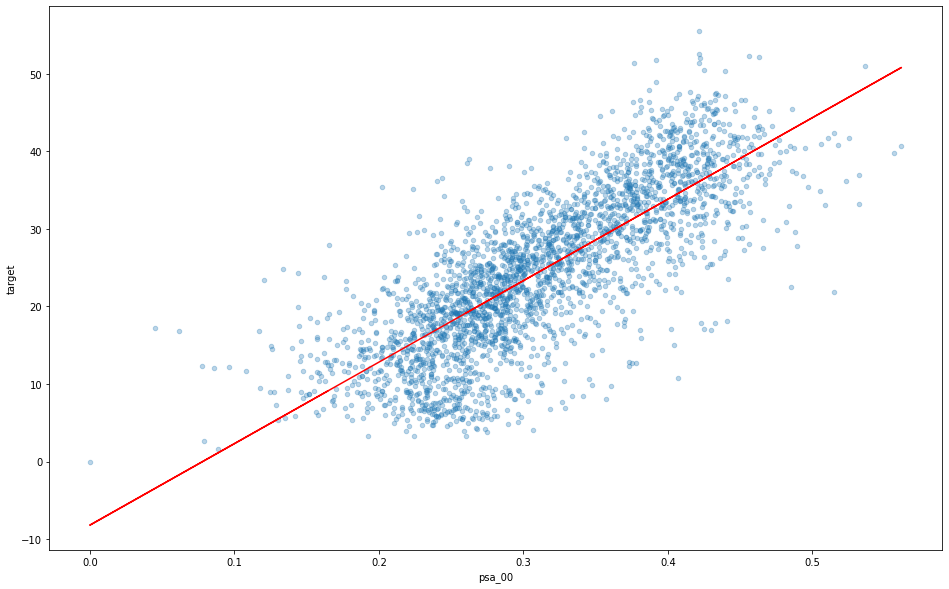

In [22]:
# The formula would be: y = -8.2131 + 105.1205 * x
# Plot this in comparison

x_lin = df_base['psa_00']
y_lin = -8.2131 + 105.1205 * x_lin
df_base.plot(x='psa_00', y='target', kind='scatter', alpha=0.3)
plt.plot(x_lin, y_lin, '-r', label='y = 100 * x')
plt.show();

In [23]:
# print metrics for linear regression model

mse_lin = sklearn.metrics.mean_squared_error(df_base['target'], y_lin)

rmse_lin = math.sqrt(mse_lin)

print("RMSE of Linear Regression model:", round(rmse_lin, 2))
print("Error in % of Linear Regression model:", round((rmse_lin/np.average(y))*100, 2))
print("Mean of the target:", round(np.average(y), 2))
print("Standard deviation of the target:", round(np.std(y), 2))

RMSE of Linear Regression model: 6.41
Error in % of Linear Regression model: 26.15
Mean of the target: 24.51
Standard deviation of the target: 10.29


It seems, our baseline model was nearly as good as the linear regression model.